In [381]:
cd C:\Users\SimoneDaniele\OneDrive - ITS Rizzoli\Desktop\Progetto finardi\UFS-04_CHURN-Analisis\

C:\Users\SimoneDaniele\OneDrive - ITS Rizzoli\Desktop\Progetto finardi\UFS-04_CHURN-Analisis


In [382]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from src.data.carica_dati import get_data

In [383]:
df=pd.read_csv('dati\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [384]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


NoneType

In [385]:
df['prezzotot']=df['MonthlyCharges']*df['tenure']
df[['MonthlyCharges','tenure','TotalCharges','prezzotot','Churn']]
# il prezzo totale è divero dal total charges poichè il prezzo dell'abbonamento deve essere variato nel tempo.
# il prezzo dell'abbonamento nel tempo deve essersi alzato poichè, per gli utenti che hanno disdetto,
# il prezzo totale che avrebbero dovuto pagare è apparentemente più basso di ciò che hanno effettivamente pagato

,MonthlyCharges,tenure,TotalCharges,prezzotot,Churn
0,29.85,1,29.85,29.85,No
1,56.95,34,1889.5,1936.30,No
2,53.85,2,108.15,107.70,Yes
3,42.30,45,1840.75,1903.50,No
4,70.70,2,151.65,141.40,Yes
...,...,...,...,...,...
7038,84.80,24,1990.5,2035.20,No
7039,103.20,72,7362.9,7430.40,No
7040,29.60,11,346.45,325.60,No
7041,74.40,4,306.6,297.60,Yes


In [386]:
# df['TotalCharges'][480:489].astype(float)
df['TotalCharges'][480:490]

480     225.75
481       2145
482     1671.6
483     8003.8
484     680.05
485    6130.85
486       1415
487    6201.95
488           
489      74.35
Name: TotalCharges, dtype: object

In [387]:
df_factorized=get_data()

In [388]:
df_factorized.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,1,0,0,2,0,0,0,0,1,2,0.089703,74,0
1,0,0,0,0.464789,0,0,2,0,2,0,0,0,0,3,0.313961,3624,0
2,0,0,0,0.014085,0,0,2,2,0,0,0,0,1,3,0.274795,536,1
3,0,0,0,0.619718,1,0,2,0,2,2,0,0,0,0,0.168035,3570,0
4,0,0,0,0.014085,0,1,0,0,0,0,0,0,1,2,0.459886,674,1


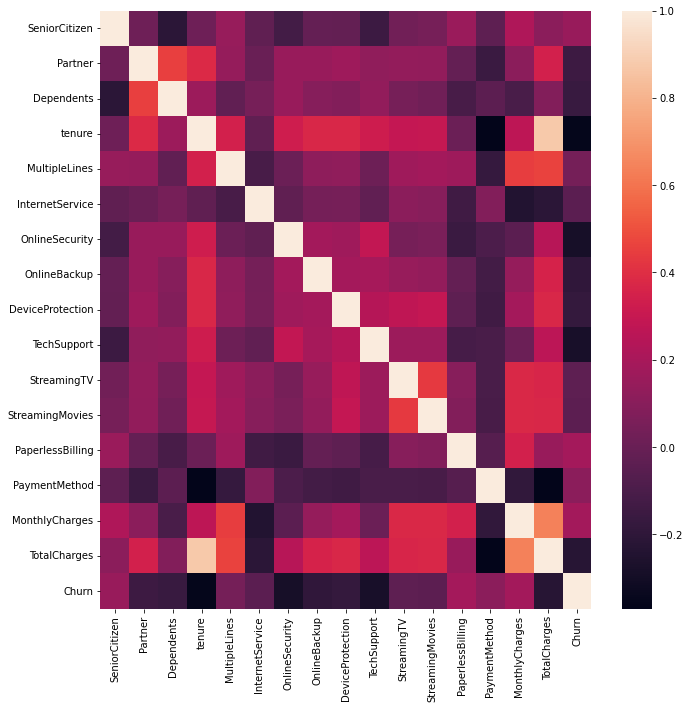

In [390]:
# plotting correlation heatmap
plt.figure(figsize=(11,11))
dataplot = sb.heatmap(df_factorized.corr())
  
# displaying heatmap

plt.savefig('img\correlation.jpg')
plt.show()


In [405]:
table = pd.pivot_table(df_factorized, values='Churn', columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
Churn,0.236503,0.416813


In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prezzotot
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2035.20
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60
